In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl
import math
import scipy.stats as ss
from math import sqrt
from scipy.stats import norm
from matplotlib.patches import Polygon



# 1. Two Players Corruption Deterrence Models

The next emaples show situations in which the expected gains of corruption would be positive. Note that this is a necessary but not sufficient condition for corruption to hold. It is also necessary that there must be a time discount sufficiently high that make repeated payoffs better than one time deffection (Folk Theorem). This is better explained on Chacha (2020) - Unpublished.


## 1.1 No Self-Reporting and No Plea Bargains:

Here I model the two players game with no possibilities of self-reporting or plea bargaining.

Assumptions:

    1 - Performing the corruption activity is costless to the Bureucrat.
    2 - Agents are rationals;
    3 - Agents are risk neutral;
    4 - There is no Agency problems (Either employees or firms are the relevant agents, they take decisions rationaly, their payoffs are the ones presented on the model);
    5 - There is no Type I judicial errors (Innocents can never be convicted);
    6- There is perfect information (agents know other regarding probabilities);
    7 - Exogenous constant probabilities;

Timming:

    1 - Goverment set the parameters ($\alpha$, $\rho$ and $F$);
    2 - Nature decides the distribution fo $\pi$ and the Entrepreneur offers $b$. The bureucrat decides to accept or not;
    3 - Prosecution authority decides to investigate or not;
    4 - If investigated, Judicial authority decides to convict or not.

Let:

$B$ = Bureucrat;

$E$ = Entrepreneur;

$\alpha$ = Probability of being detected by the authority, i.e. probability of being investigated;

$\rho$ = Probability that, if detected, be convicted.

$b$ = bribe

$\pi$ = Net profit from corruption

$F$ = Fine / Sanction converted in monetary terms.



**Agent decision rule**:

For the Entrepreneur:

$$-b+(1-\alpha )\pi + \alpha [(1-\rho)\pi -\rho F)] > 0 $$

For simplicity:
$p_i$ = probability that $i$ happens for $i ={ \pi, F, b}$

$p_F = \alpha \rho$ and $p_{\pi}= (1 - \alpha \rho)$



$$ -b + p_{\pi}\pi + p_{F}F >0 $$

The entrepreneur accepts the bribe if: 

$$ \pi > \frac{b+p_{F}F}{p_{\pi}} $$



For the Bureucrat:

$$(1-\alpha )b + \alpha [(1-\rho)b -\rho F)] > 0 $$

Being $p_b = p_\pi$,


$$ p_{b}b + p_{F}F >0 $$

The Bureucrat accepts the bribe if: 

$$ b > \frac{p_{F}F}{p_{b}} $$


Probabilities are the same for both players.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars


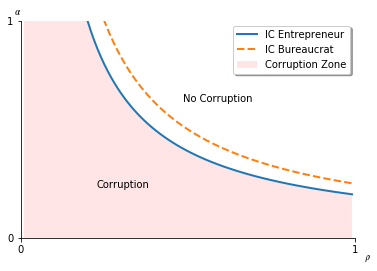

In [27]:
# Indiference Curves
n = 100
x = np.arange(0, 1,1/n )
rho = []
alpha = []
b = 2
pi = 4
F = 6
N = 0.5

alphaIE = [] # -b+(1-alpha )pi + alpha [(1-rho)\pi -rho F) = 0

for i in x:
    alphaIE.append((pi-b)/(i*(pi+F))) # inclinacao da curva de ind é rho^-1*(pi-b)/

alphaIB = []

for i in x:
    alphaIB.append((b)/(i*(b+F))) # inclinacao da curva de ind é rho^-1*(b-pi)/

#Ploting Indiference curves

fig, ax = plt.subplots()

ax.plot(x, alphaIE, linewidth=2)
ax.plot(x, alphaIB,'--', linewidth=2)

fig.add_subplot(ax)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig.text(0.92, 0.05, '$𝜌$')
fig.text(0.11, 0.9, '$𝛼$')

ax.fill_between(x, alphaIE, facecolor='red', alpha=0.1)

plt.ylim([0, 1])
plt.xlim([0, 1])
plt.xticks(np.arange(0,1.1,1))
plt.yticks(np.arange(0,1.1,1))
#plt.title('Indiference curves')
plt.legend(('IC Entrepreneur', 'IC Bureaucrat', 'Corruption Zone' ),
           loc='best', shadow=True)

fig.text(0.3, 0.3, 'Corruption')
fig.text(0.5, 0.6, 'No Corruption')
plt.show()

fig.savefig('fig1.pdf')





Slope of indifference curves:

$$\alpha_{IC_{E}}= \frac{\pi - b}{\rho(\pi+F)}$$

$$\alpha_{IC_{B}}= \frac{b}{\rho(b+F)}$$




**Backer-like conclusions:**

It is always possible to exchange $F$ for an  or $p_F(\alpha \rho)$ such that the level of deterrence is unchanged, i.e. the harm (here measured by $p_{\pi}(b-\pi)$ for the entrepreneur and $p_{b}(b)$ for the Bureucrat, for $p_{b} = p{\pi}$) divided by $p_F$ always stays the same. 

** Proof: If $\alpha \rho = f (e)$ for $e$ being the enforcement expenditure, and $f'(e)>0$ and $f''(e)<0$ then $F'(\alpha \rho) > 0 $ and $ F''(\alpha \rho) > 0$ . Therefore, this function has no maximum besides the maximum fine itself. **


If fines are costless and enforcements are function of the authority's expenditure, tha  than maximum fines are optimal.

There is no other regarding decision.

**MAKE THE MODEL USING INPRINSONMENT AND WEALTH.**


## 1.2Two Stage: With Self-Reporting:

Consider now that the players can report their offences in exchange of some reduced fine $RF$ such that $R \in [0,1]$.

Let  $\gamma_i$ be the probability of $i$ self-report, for $i \in [B,E]$. Agents have complete information about $\gamma_E$ which is given exogenously.

Suppose that, agents have enough information to self-report and make the other party convicted with certainty.

If agents self-report at the same time, they share the fine. (Hard assumption, present on other studies.)

Timming:

    1 - Goverment set the parameters ($\alpha$, $\rho$ and $F$);
    2 - Nature decides the distribution fo $\pi$ and the Entrepreneur offers $b$. The bureucrat decides to accept or not; (if $\pi$ is up to the Entrepreneur to decide, than restrictive punishment may be counter productive)
    4 - Parties decide to self-report or not;
    5 - Prosecution authority decides to investigate or not;
    6 - If investigated, Judicial authority decides to convict or not.

**Agent decision rule**:

For the Entrepreneur:

$$-b+(1- \gamma_E)(1- \gamma_B)(1-\alpha )\pi + \alpha(1- \gamma_E)(1- \gamma_B) [(1-\rho)\pi -\rho F)] - (1-\gamma_E)\gamma_BF - (1-\gamma_B) \gamma_ERF - \gamma_E \gamma_B F/N > 0 $$

For simplicity:
$p_i$ = probability that $i$ happens for $i ={ \pi, F, b}$

Therefore:

$p_{F_E} = f (\alpha , \rho, \gamma_B , \gamma_E) = \alpha \rho (1- \gamma_E)(1- \gamma_B) + (1-\gamma_B)\gamma_E R + (1- \gamma_E)\gamma_B + \gamma_E \gamma_B /N$  and 

$p_{\pi}=  f (\alpha , \rho, \gamma_B , \gamma_E) = (1 - \alpha\rho)(1- \gamma_{E})(1- \gamma_{B})$

Agregating for $(1-\gamma_E)(1-\gamma_B) = \Gamma$, then:

$p_{F_E} = \alpha \rho \Gamma + (1-\gamma_B)\gamma_E R + (1- \gamma_E)\gamma_B + \gamma_E \gamma_B /N$  and 

$p_{\pi}=  (1 - \alpha\rho) \Gamma $

Probabilities of being fined are now other regarding.

$$ -b + p_{\pi}\pi + p_{F}F >0 $$ or,

$$ -b + \pi \Gamma (1 - \alpha\rho) - F (\alpha \rho \Gamma + (1-\gamma_B)\gamma_E R + (1- \gamma_E)\gamma_B + \gamma_E \gamma_B /N)>0 $$




For the Bureucrat:

$$(1- \gamma_E)(1- \gamma_B)(1-\alpha )b + \alpha(1- \gamma_E)(1- \gamma_B) [(1-\rho)\pi -\rho F)] - (1-\gamma_E)\gamma_B R F - (1-\gamma_B) \gamma_E F - \gamma_E \gamma_B F/N > 0 $$

being:

$p_{F_B} =  f (\alpha , \rho, \gamma_B , \gamma_E) = \alpha \rho (1- \gamma_E)(1- \gamma_B) + (1-\gamma_B)\gamma_E + (1- \gamma_E)\gamma_B R + \gamma_E \gamma_B /N$  and 

$p_{b}= f (\alpha , \rho, \gamma_B , \gamma_E) = p_{\pi}= (1 - \alpha \rho )(1- \gamma_{E})(1- \gamma_{B})$

or, 

$p_{F_B} =  \alpha \rho \Gamma + (1-\gamma_B)\gamma_E + (1- \gamma_E)\gamma_B R + \gamma_E \gamma_B /N$  and 

$p_{b}=  (1 - \alpha \rho) \Gamma $


$$ p_{b}b + p_{F}F >0 $$

or else,

$$ b (1 - \alpha \rho) - F (\alpha \rho \Gamma + (1-\gamma_B)\gamma_E + (1- \gamma_E)\gamma_B R + \gamma_E \gamma_B /N) \Gamma  >0 $$


Note that, probabilities of fine are now different for every player. And both probabilities of being fined or earn the corruption premium are now dependent the other player action.


If $\gamma_E$ and $\gamma_b$ are independent from $\alpha$ and $\rho$, then difference there is no intercept for $\alpha$ or $\rho$. 






## Factoring for each variable (Apendix)

**For the entrepreneur:CORRECT**

$$ -b + \pi \Gamma (1 - \alpha\rho) - F (\alpha \rho \Gamma + (1-\gamma_B)\gamma_E R + (1- \gamma_E)\gamma_B + \gamma_E \gamma_B /N)>0 $$

Factoring for all individual terms:


$$ -\alpha F \Gamma \rho - \alpha \Gamma \rho \pi - \gamma_E \gamma_B F/N + \gamma_E \gamma_B F R - \gamma_B F + \gamma_E \gamma_B F - b - \gamma_E F R + \Gamma \pi $$



Isolating $\alpha$:

$$ \alpha > \frac{ \gamma_E \gamma_B F/N - \gamma_E \gamma_B F R + \gamma_B F - \gamma_E \gamma_B F + b + \gamma_E F R - \Gamma \pi }{- F \Gamma \rho -  \Gamma \rho \pi} $$  


**For the bureucrat:**

$$ b (1 - \alpha \rho) - F (\alpha \rho \Gamma + (1-\gamma_B)\gamma_E + (1- \gamma_E)\gamma_B R + \gamma_E \gamma_B /N) \Gamma  >0 $$

Factoring for all individual terms:


$$ -\alpha b \Gamma \rho - \alpha F \Gamma \rho - \gamma_E \gamma_B F/N + \gamma_E \gamma_B F R  -  \gamma_B F R  + \gamma_E \gamma_B F + b \Gamma - \gamma_E F $$


Isolating $\alpha$:

$$ \alpha  > \frac{\gamma_E \gamma_B F/N - \gamma_E \gamma_B F R  +  \gamma_B F R  - \gamma_E \gamma_B F - b \Gamma + \gamma_E F}{- b \Gamma \rho - F \Gamma \rho} $$


**$\alpha$ of equilibrium:**




In [28]:
#PROOF CHECKING OF THE FACTORING

gammaE = 0.13
gammaB = 0.12
R = 0.05
rho = 0.15
alpha = 0.1

Gamma = (1-gammaE)*(1-gammaB)

#Proof computing of the factoring

z = -b  + pi*Gamma*(1 - alpha*rho) -F*(alpha*rho*Gamma + (1-gammaB)*gammaE*R + (1-gammaE)*gammaB + gammaE*gammaB*N)
z2 = -alpha*F*Gamma*rho - alpha*Gamma*rho*pi - gammaE*gammaB*F*N + gammaE*gammaB*F*R - gammaB*F + gammaE*gammaB*F - b -gammaE*F*R + Gamma*pi
y = b*(1 - alpha*rho)*Gamma - F*(alpha*rho*Gamma + (1-gammaB)*gammaE + (1- gammaE)*gammaB*R + gammaE*gammaB*N)
y2 = -alpha*b*Gamma*rho - alpha*F*Gamma*rho - gammaE*gammaB*F*N + gammaE*gammaB*F*R  - gammaB*F*R  + gammaE*gammaB*F + b*Gamma - gammaE*F 
print(z==z2)
print (y==y2)
print (z,z2,y, y2)


#equilibrium alpha - Try general equilibrium after
#(gammaB*F + gammaB*pi + gammaE*gammaB*pi -gammaE*RF+gammaE*pi - pi + b)/(rho*gammaB*F - rho*gammaE*gammaB*F + rho*gammaB*pi - rho*gamma*B*gamma*E*pi -rho*F + rho*gamma_E F - rho*pi + rho*gammaE*pi) = (gammaB*b -gammaE*gammaB*b + gamma*B*F*R + gammaE*b +gammaE*F - b)/(rho*gammaB*b -rho*gammaB*gammaE*b +rho*gammaB*F - rho*gammaE*gammaB*F - rho*b + rho*gammaE*b - rho*F + rho*gammaE*F)





True
True
0.2400399999999996 0.2400399999999996 0.6748079999999999 0.6748079999999999


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in double_scalars


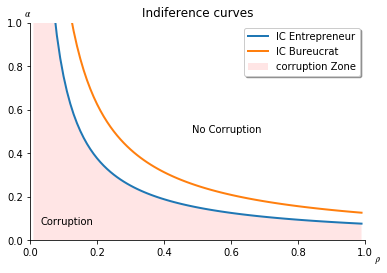

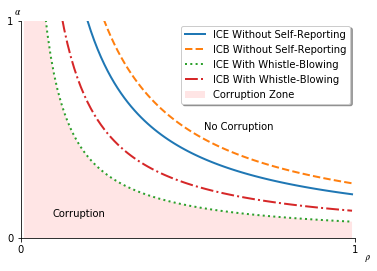

No handles with labels found to put in legend.


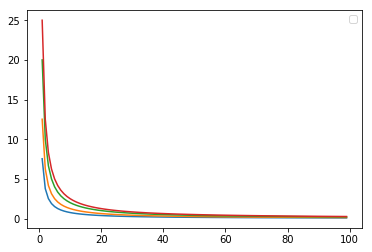

In [29]:
#tracing indifference curves

gammaB = 0.12
gammaE = 0.13
Gamma = (1-gammaE)*(1-gammaB)
R = 0.05


#For the entrepreneur

alphaIE2 = []

for i in x:
    alphaIE2.append((gammaE*gammaB*F*N - gammaE*gammaB*F*R + gammaB*F - gammaE*gammaB*F + b + gammaE*F*R - Gamma*pi )/(- F*Gamma*i - Gamma*rho*i))
    
    
#For the Bureucrat        
alphaIB2 = []

for i in x:
    alphaIB2.append( (gammaE*gammaB*F*N - gammaE*gammaB*F*R  +  gammaB*F*R  - gammaE*gammaB*F - b*Gamma + gammaE*F)/(- b*Gamma*i - F*Gamma*i))
    

    
    

fig, ax = plt.subplots()

ax.plot(x, alphaIE2, linewidth=2)
ax.plot(x, alphaIB2, linewidth=2)





fig.add_subplot(ax)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig.text(0.92, 0.05, '$𝜌$')
fig.text(0.11, 0.9, '$𝛼$')

ax.fill_between(x, alphaIE2, facecolor='red', alpha=0.1)

plt.ylim([0, 1])
plt.xlim([0, 1])
plt.xticks(np.arange(0,1.1,0.2))
plt.yticks(np.arange(0,1.1,0.2))
plt.title('Indiference curves')
plt.legend(('IC Entrepreneur', 'IC Bureucrat', 'corruption Zone' ),
           loc='best', shadow=True)

fig.text(0.15, 0.18, 'Corruption')
fig.text(0.5, 0.5, 'No Corruption')
plt.show()



fig, ax = plt.subplots()


ax.plot(x, alphaIE, linewidth=2)
ax.plot(x, alphaIB,'--', linewidth=2)
ax.plot(x, alphaIE2,':', linewidth=2)
ax.plot(x, alphaIB2, '-.', linewidth=2)




fig.add_subplot(ax)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig.text(0.92, 0.05, '$𝜌$')
fig.text(0.11, 0.9, '$𝛼$')

ax.fill_between(x, alphaIE2, facecolor='red', alpha=0.1)

plt.ylim([0, 1])
plt.xlim([0, 1])
plt.xticks(np.arange(0,1.1,1))
plt.yticks(np.arange(0,1.1,1))
#plt.title('Indiference curves')
plt.legend(( 'ICE Without Self-Reporting', 'ICB Without Self-Reporting','ICE With Whistle-Blowing', 'ICB With Whistle-Blowing', 'Corruption Zone' ),
           loc='best', shadow=True)

fig.text(0.2, 0.2, 'Corruption')
fig.text(0.55, 0.5, 'No Corruption')
plt.show()

plt.legend()
plt.plot(alphaIE2)
plt.plot(alphaIB2)
plt.plot(alphaIE)
plt.plot(alphaIB)

fig.savefig('fig2.pdf')


There is a deterrent effect when probabilities of reporting are positive.

Note that now, for the. If the probability of conviction is negletctible, there is still a treshhold in which agents are not goingo to perform corruption if they can be reported by other parties.


**RECHECK THE RESULTS**

There is a set of solutions in witch bribes are still worthy. The agents decide ex-ante the bribe and the value that fits on the set.


** Double checked the equation..... now we have to check the intuition **

Since ppayoffs are both decreasing in $\gamma_i$, the agent diminishes his/her own probability of reporting so the aoutcome still positive. (behavioural view would state that probability of report is positively dependent on the other decision. In this specific graphic, what is being traded of is how much one have to lower his probability of reporting in order to admi trading with a less trustfull partner.)


What determin probabilities, With game strategy, There is no equilibrium in which self-report is dominant strategy. Under irrationality or change of probabilities from one game to another. (**TEST HYPOTHESIS**)


**Deterrence effect** Under exogenous positive $\gamma_i$, agents have lesser incetives to corrutp. Since $\pi$ is increasing in $\gamma_i$ ($\gamma_i(\pi)> 0 $)one has to have a bigger corruption oportunity to be corrupt.   



Shouldnt the probability of report increase with the probability of detection and conviction?

## 1.3 Two Stage: With Plea Bargaining:

Consider now that the players, if detected, can plead guilty in exchange of some reduced fine $PF$ such that $P \in [0,1]$.

Let  $\beta_i$ be the probability of $i$ pled guilty, for $i \in [B,E]$. Agents have complete information about $\beta_i$ which is given exogenously.

Suppose that, agents have enough information to make a plea agreement that makes the other party convicted with certainty.

If both parties plead guilty at the same time, they share the fine (For this example, they pay both a reduced fine 
$p$, where, $p>P$).

Timming:

    1 - Goverment set the parameters ($\alpha$, $\rho$ and $F$);
    2 - Nature decides the distribution fo $\pi$ and the Entrepreneur offers $b$. The bureucrat decides to accept or not; (if $\pi$ is up to the Entrepreneur to decide, than restrictive punishment may be counter productive)
    4 - Prosecution authority decides to investigate or not;
    5 - If investigated, prosecutors propose a plea offer of a reduced $PF$ fine;
    6 - If investigated, Judicial authority decides to convict or not.

**Agent decision rule**:

For the Entrepreneur:

$$-b+(1-\alpha )\pi + \alpha [((1-\beta_E)(1-\beta_B)(1-\rho)\pi -\rho F) - (1-\beta_B)\beta_E P F - (1- \beta_E )\beta_B F - \beta_E \beta_B p F ] > 0 $$

For simplicity:

$p_i$ = probability that $i$ happens for $i ={ \pi, F, b}$

Therefore, for $B = (1-\beta_E)(1- \beta_B)$

$p_{F_E} = \alpha [\rho B + (1-\beta_B )\beta_E P + (1- \beta_E)\beta_B + \beta_B \beta_E p ]$  and 

$p_{\pi}= (1 - \alpha) + \alpha B (1-\rho)$

It stills:


$$ -b + p_{\pi}\pi + p_{F}F >0 $$ 

or else,

$$ -b + \pi((1 - \alpha) + \alpha B (1-\rho)) - F \alpha [\rho B + (1-\beta_B )\beta_E P + (1- \beta_E)\beta_B + \beta_B \beta_E p ] >0 $$ 


For the Bureucrat:

$$(1-\alpha )b + \alpha [(1-\beta_B)(1-\beta_E)((1-\rho)b -\rho F) -\beta_B P F - \beta_E F] > 0 $$

being:

$p_{F_B} = \alpha [\rho B + (1-\beta_B )\beta_E  + (1- \beta_E)\beta_B P + \beta_B \beta_E p ]$  and 

$p_b= (1 - \alpha) + \alpha B (1-\rho)$

The decision rules is,

$$ p_{b}b + p_{F}F >0 $$

or else,


$$ b ((1 - \alpha) + \alpha B (1-\rho))  - F  \alpha [\rho B + (1-\beta_B )\beta_E  + (1- \beta_E)\beta_B P + \beta_B \beta_E p  >0 $$



Note that, probabilities of fine are now different for every player. And both probabilities of being fined or earn the corruption premium are now depending on other player's action.


## Factoring - Appendix
Factoring for all individual terms:

$$-\beta_E \alpha \beta_B F p + \beta_E \alpha \beta_B F P - \alpha \beta_B F + \beta_E \alpha \beta_B F - \alpha B F \rho - \alpha B \rho \pi + \alpha B \pi - \beta_E \alpha F P- \alpha \pi - b + \pi$$



Rearranging for alpha:

$$ \alpha = \frac{b - \pi}{-\beta_E  \beta_B F p + \beta_E \beta_B F P - \beta_B F + \beta_E \beta_B F - B F \rho - B \rho \pi +  B \pi - \beta_E F P- \pi}  $$

if $\rho = 0$ than $\alpha = \frac{b -\pi}{- \beta_B F - \beta_E P F +  \pi B - \pi}$

For the Bureucrat:

$$ b ((1 - \alpha) + \alpha B (1-\rho))  - F  \alpha [\rho B + (1-\beta_B )\beta_E  + (1- \beta_E)\beta_B P + \beta_B \beta_E p  >0 $$


Factoring for individual terms:

$$-\beta_E \alpha \beta_B F p - \alpha \beta_B F P + \beta_E \alpha \beta_B F P + \beta_E \alpha \beta_B F - \alpha B b \rho + \alpha B b - \alpha B F \rho - \alpha b - \beta_E \alpha F + b $$

rearranging for alpha:

$$\alpha = \frac{-b}{-\beta_E \beta_B F p -  \beta_B F P + \beta_E  \beta_B F P + \beta_E\beta_B F -B b \rho + B b -  B F \rho -  b - \beta_E  F } $$



In [30]:
#PROOF TESTING THE FACTORING
P= 0.15
p = 0.6
betaB = 0.2
betaE = 0.25
B = (1-betaE)*(1-betaB)



w =-b + pi*((1 -alpha) + alpha*B*(1-rho)) - F*alpha*(rho*B + (1-betaB)*betaE*P + (1- betaE)*betaB + betaB*betaE*p)
w3 = -b + (1-alpha)*pi + alpha*(B*((1-rho)*pi-rho*F)-(1-betaE)*betaB*F-(1-betaB)*betaE*P*F - betaB*betaE*p*F)
w2 = -betaE*alpha*betaB*F*p + betaE*alpha*betaB*F*P - alpha*betaB*F + betaE*alpha*betaB*F - alpha*B*F*rho - alpha*B*rho*pi + alpha*B*pi - betaE*alpha*F*P - alpha*pi - b + pi
    
y = b*((1 - alpha) + alpha*B*(1-rho))  - F*alpha*(rho*B + (1-betaB)*betaE  + (1- betaE)*betaB*P + betaB*betaE*p) 
y1 =  -betaE*alpha*betaB*F*p - alpha*betaB*F*P + betaE*alpha*betaB*F*P + betaE*alpha*betaB*F - alpha*B*b*rho + alpha*B*b - alpha*B*F*rho - alpha*b - betaE*alpha*F + b


print(w==w2)
print(w,w2,w3)

print(y==y1)
print(y,y1)

True
1.624 1.624 1.624
False
1.6965000000000001 1.6965


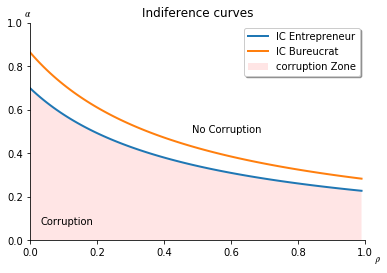

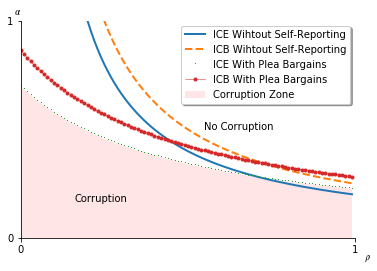

In [31]:
#tracing indifference curves

#For the entrepreneur

alphaIE3 = []

for i in x:
    alphaIE3.append((b - pi)/(-betaE*betaB*F*p + betaE*betaB*F*P -betaB*F + betaE*betaB*F - B*F*i - B*i*pi +  B*pi - betaE*F*P - pi))
#For the Bureucrat       


alphaIB3 = []

for i in x:
    alphaIB3.append(-b/(-betaE*betaB*F*p - betaB*F*P + betaE*betaB*F*P + betaE*betaB*F - B*b*i + B*b - B*F*i - b - betaE*F))


    
    

fig, ax = plt.subplots()

ax.plot(x, alphaIE3, linewidth=2)
ax.plot(x, alphaIB3, linewidth=2)





fig.add_subplot(ax)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig.text(0.92, 0.05, '$𝜌$')
fig.text(0.11, 0.9, '$𝛼$')

ax.fill_between(x, alphaIE3, facecolor='red', alpha=0.1)

plt.ylim([0, 1])
plt.xlim([0, 1])
plt.xticks(np.arange(0,1.1,0.2))
plt.yticks(np.arange(0,1.1,0.2))
plt.title('Indiference curves')
plt.legend(('IC Entrepreneur', 'IC Bureucrat', 'corruption Zone' ),
           loc='best', shadow=True)

fig.text(0.15, 0.18, 'Corruption')
fig.text(0.5, 0.5, 'No Corruption')
plt.show()



fig, ax = plt.subplots()
ax.plot(x, alphaIE, linewidth=2)
ax.plot(x, alphaIB,'--', linewidth=2)
ax.plot(x, alphaIE3, ',', linewidth=2)
ax.plot(x, alphaIB3, '.-', linewidth=.5)



fig.add_subplot(ax)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig.text(0.92, 0.05, '$𝜌$')
fig.text(0.11, 0.9, '$𝛼$')

ax.fill_between(x, alphaIE3, facecolor='red', alpha=0.1)

plt.ylim([0, 1])
plt.xlim([0, 1])
plt.xticks(np.arange(0,1.1,1))
plt.yticks(np.arange(0,1.1,1))
#plt.title('Indiference curves')
plt.legend(('ICE Wihtout Self-Reporting', 'ICB Wihtout Self-Reporting','ICE With Plea Bargains', 'ICB With Plea Bargains',  'Corruption Zone' ),
           loc='best', shadow=True)

fig.text(0.25, 0.25, 'Corruption')
fig.text(0.55, 0.5, 'No Corruption')
plt.show()

fig.savefig('fig3.pdf')


## 1.4 Three Stage Game: With Self-Reporting and Plea Bargains:

Immagine now that, if offenders are caught, they can plea guilty in exchange for a reduced fine of $PR$ such that $P \in [0,1]$. Again, the prosecutors use the defendant's information to convict the other party with certainty. 

Let  $\gamma_i$ be the probability of $i$ self-report, for $i \in [B,E]$. 

Suppose that, agents have enough information to self-report and make the other party convicted with certainty.

Timming:

    1 - Goverment set the parameters ($\alpha$, $\rho$ and $F$);
    2 - Nature decides the distribution of $\pi$ and the Entrepreneur offers $b$. The bureucrat decides to accept or not;
    4 - Parties decide to self-report or not;
    5 - Prosecution authority decides to investigate or not;
    6 - If investigated, prosecutors propose a plea offer of a reduced $PF$ fine;
    7 - If parties do not plea guilty, the judiciary trials with $\rho$ probability of conviction.

**Agent decision rule**:

For the Entrepreneur:

$$-b+(1- \gamma_{E})(1- \gamma_{B})(1-\alpha )\pi + \alpha(1- \gamma_{E})(1- \gamma_{B}) [(1-\beta_E)(1-\beta_B)[(1-\rho)\pi -\rho F] - (1-\beta_B)\beta_E PF - (1-\beta_E)\beta_B F - \beta_E \beta_B p ] - (1-\gamma_E)\gamma_B F -(1-\gamma_B) \gamma_E R F -\gamma_E \gamma_B /N > 0 $$

For simplicity:
$p_i$ = probability that $i$ happens for $i ={ \pi, F, b}$

$p_{F_E} = \alpha(1-\gamma_E)(1-\gamma_B)[(1-\beta_B)(1-\beta_E) \rho + (1-\beta_B)\beta_E P + (1- \beta_E)\beta_B + \beta_E \beta_B p] + (1-\gamma_B)\gamma_E R + (1-\gamma_E)\gamma_B + \gamma_E \gamma_B / N $

$p_{\pi}= (1- \gamma_{E})(1- \gamma_{B})[(1-\alpha) + \alpha(1- \beta_E)(1- \beta_B)(1-\rho)]$

Agrregating the following: 

$(1-\gamma_E)(1-\gamma_B) = \Gamma$ = Probability of not self-reporting
     
$(1-\beta_E)(1-\beta_B) = B $ = Probability of not pleading guilty

then,

$p_{F_E} = f (\alpha, \rho, \gamma_E , \gamma_B, \beta_B, \beta_E, P, R, p, N) $

$p_{F_E} =\alpha \Gamma (B \rho + (1-\beta_B)\beta_E P + (1- \beta_E)\beta_B + \beta_E \beta_B p) + (1-\gamma_B)\gamma_E R + (1-\gamma_E)\gamma_B + \gamma_E \gamma_B / N$ , and

$p_{\pi}= f (\alpha, \rho, \gamma_E , \gamma_B, \beta_B, \beta_E, P, R, p, N) $

$p_{\pi}=  \Gamma [(1-\alpha) + \alpha B (1-\rho) ]$


Rewriting the decision rule:

$$ -b + \pi \Gamma [(1-\alpha) + \alpha B (1-\rho) - F (\alpha \Gamma (B \rho + (1-\beta_B)\beta_E P + (1- \beta_E)\beta_B + \beta_E \beta_B p) + (1-\gamma_B)\gamma_E R + (1-\gamma_E)\gamma_B + \gamma_E \gamma_B / N) >0 $$


For the Bureucrat:

$$ (1- \gamma_{E})(1- \gamma_{B})(1-\alpha )b + \alpha(1- \gamma_{E})(1- \gamma_{B}) [(1-\beta_E)(1-\beta_B)[(1-\rho)b -\rho F] - (1-\beta_B)\beta_E  F - (1-\beta_E)\beta_B P F - \beta_E \beta_B p ] - (1-\gamma_E)\gamma_B R F -(1-\gamma_B) \gamma_E F -\gamma_E \gamma_B /N > 0 $$

Since, 
$p_{F_E} = f (\alpha, \rho, \gamma_E , \gamma_B, \beta_B, \beta_E, P, R, p, N) $

$p_{F_E} =\alpha \Gamma (B \rho + (1-\beta_B)\beta_E  + (1- \beta_E)\beta_B P + \beta_E \beta_B p) + (1-\gamma_B)\gamma_E + (1-\gamma_E)\gamma_B R + \gamma_E \gamma_B / N$ , and

$p_{\pi}= f (\alpha, \rho, \gamma_E , \gamma_B, \beta_B, \beta_E, P, R, p, N) $

$p_{\pi}=  \Gamma [(1-\alpha) + \alpha B (1-\rho) ]$

then,

$$ b \Gamma [(1-\alpha) + \alpha B (1-\rho) - F (\alpha \Gamma (B \rho + (1-\beta_B)\beta_E  + (1- \beta_E)\beta_B P + \beta_E \beta_B p) + (1-\gamma_B)\gamma_E + (1-\gamma_E)\gamma_B R + \gamma_E \gamma_B / N) $$







## Factoring - Appendix
Factoring for all individual terms:



$$-\alpha B F \Gamma \rho - \alpha B \Gamma \rho \pi +\alpha B \Gamma \pi - \alpha F \Gamma p \beta_E \beta_B + \alpha F \Gamma P \beta_E \beta_B - \alpha F \Gamma P \beta_E + \alpha F \Gamma \beta_E \beta_B - \alpha F \Gamma \beta_B - \alpha \Gamma \pi - b + F R \gamma_E \gamma_B - F R \gamma_E + F \gamma_E \gamma_B - F \gamma_B + \Gamma \pi - \gamma_E \gamma_B F N $$


Rearranging for alpha:



$$\alpha = \frac{ b - F R \gamma_E \gamma_B + F R \gamma_E - F \gamma_E \gamma_B + F \gamma_B - \Gamma \pi + \gamma_E \gamma_B F N}{- B F \Gamma \rho -  B \Gamma \rho \pi + B \Gamma \pi -  F \Gamma p \beta_E \beta_B + F \Gamma P \beta_E \beta_B - F \Gamma P \beta_E + F \Gamma \beta_E \beta_B - F \Gamma \beta_B -  \Gamma \pi}  $$
For the Bureucrat:

$$ -\alpha b B\Gamma\rho + \alpha b B\Gamma - \alpha b\Gamma - \alpha B F\Gamma\rho - \alpha F\Gamma p\beta_E\beta_B  + \alpha F\Gamma P \beta_E\beta_B - \alpha F\Gamma P\beta_B + \alpha F \Gamma \beta_E \beta_B - \alpha F\Gamma \beta_E + b\Gamma  - F N\gamma_E\gamma_B + F R\gamma_E\gamma_B - F R\gamma_B + F \gamma_E\gamma_B - F\gamma_E$$

rearrangeing,

$$ \alpha = \frac{- b B\Gamma\rho +  b B\Gamma -  b\Gamma -  B F\Gamma\rho -  F\Gamma p\beta_E\beta_B  +  F\Gamma P \beta_E\beta_B -  F\Gamma P\beta_B +  F \Gamma \beta_E \beta_B -  F\Gamma \beta_E}{ - b\Gamma  + F N\gamma_E\gamma_B - F R\gamma_E\gamma_B + F R\gamma_B - F \gamma_E\gamma_B + F\gamma_E}  $$

$$ \alpha = \frac{- b \Gamma(B(\rho +  b  -  F\rho) -  b -  F( p\beta_E\beta_B  +  P \beta_E\beta_B -  P\beta_B +  \beta_E \beta_B -  \beta_E))}{ - b\Gamma  + F (N\gamma_E\gamma_B - R\gamma_E\gamma_B + R\gamma_B - \gamma_E\gamma_B +\gamma_E)}  $$




In [32]:
#PROOF CHECKING

gammaB= 0.12
gammaE= 0.13
betaB = 0.2
betaE= 0.25
B = (1-betaE)*(1-betaB)
Gamma = (1-gammaE)*(1-gammaB)
p = 0.6
P= 0.1
N= 0.5



w = -b + pi*Gamma*((1-alpha) + alpha*B*(1-rho)) - F*(alpha*Gamma*(B*rho + (1-betaB)*betaE*P +(1- betaE)*betaB + betaE*betaB*p) + (1-gammaB)*gammaE*R + (1-gammaE)*gammaB + gammaE*gammaB*N)                      

w1 = -b + pi*Gamma*(1-alpha) + alpha*Gamma*(B*((1-rho)*pi-F*rho)-(1-betaB)*betaE*P*F-(1-betaE)*betaB*F-F*betaB*betaE*p)-(1-gammaB)*gammaE*R*F-(1-gammaE)*gammaB*F -gammaB*gammaE*N*F

w2 = -alpha*B*F*Gamma*rho - alpha*B*Gamma*rho*pi +alpha*B*Gamma*pi - alpha*F*Gamma*p*betaE*betaB + alpha*F*Gamma*P*betaE*betaB - alpha*F*Gamma*P*betaE + alpha*F*Gamma*betaE*betaB - alpha*F*Gamma*betaB - alpha*Gamma*pi - b + F*R*gammaE*gammaB - F*R*gammaE + F*gammaE*gammaB - F*gammaB + Gamma*pi - gammaE*gammaB*F*N


z = b*Gamma*(1-alpha) + alpha*Gamma*(B*((1-rho)*b-F*rho)-(1-betaB)*betaE*F-(1-betaE)*betaB*F*P-F*betaB*betaE*p)-(1-gammaB)*gammaE*F-(1-gammaE)*gammaB*F*R -gammaB*gammaE*N*F

z2 =-alpha*b*B*Gamma*rho + alpha*b*B*Gamma - alpha*b*Gamma - alpha*B*F*Gamma*rho - alpha*F*Gamma*p*betaE*betaB  + alpha*F*Gamma*P*betaE*betaB - alpha*F*Gamma*P*betaB + alpha*F*Gamma*betaE*betaB - alpha*F*Gamma*betaE + b*Gamma  - F*N*gammaE*gammaB + F*R*gammaE*gammaB - F*R*gammaB + F*gammaE*gammaB - F*gammaE







#-b+v*G*(1-a)+a*G*(B*((1-r)*v-F*r)-(1-u)*t*P*F-(1-t)*u*F-F*t*u*p)-(1-U)*T*R*F-(1-T)*U*F -T*U*N*F


print(w==w1==w2)
print(w,w1,w2)          
print(z==w2)
print(z,z2)  

False
0.0716079999999999 0.07160799999999996 0.07160799999999919
False
0.5377656000000001 0.5377655999999997


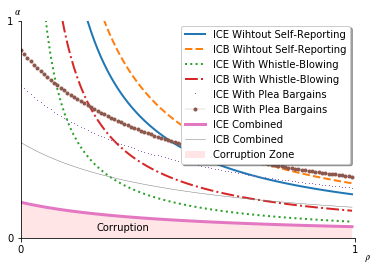

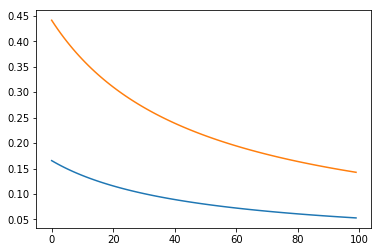

In [33]:

#For the entrepreneur

alphaIE4 = []

for i in x:
    alphaIE4.append((b - F*R*gammaE*gammaB + F*R*gammaE - F*gammaE*gammaB + F*gammaB - Gamma*pi + gammaE*gammaB*F*N)/
                   ( -B*F*Gamma*i - B*Gamma*i*pi +B*Gamma*pi - F*Gamma*p*betaE*betaB + F*Gamma*P*betaE*betaB 
                     - F*Gamma*P*betaE + F*Gamma*betaE*betaB - F*Gamma*betaB - Gamma*pi))

    
#For the Bureucrat        
alphaIB4 = []

for i in x:
    alphaIB4.append((- b*Gamma  + F*N*gammaE*gammaB - F*R*gammaE*gammaB + F*R*gammaB - F*gammaE*gammaB + F*gammaE)/
                    (-b*B*Gamma*i + b*B*Gamma - b*Gamma - B*F*Gamma*i - F*Gamma*p*betaE*betaB  + F*Gamma*P*betaE*betaB 
                     - F*Gamma*P*betaB + F*Gamma*betaE*betaB - F*Gamma*betaE))
    

    
    

fig, ax = plt.subplots()


ax.plot(x, alphaIE, linewidth=2)
ax.plot(x, alphaIB,'--', linewidth=2)
ax.plot(x, alphaIE2,':', linewidth=2)
ax.plot(x, alphaIB2, '-.', linewidth=2)
ax.plot(x, alphaIE3, ',', linewidth=2)
ax.plot(x, alphaIB3, '.-', linewidth=.2)


ax.plot(x, alphaIE4, linewidth=3)
ax.plot(x, alphaIB4,linewidth=0.5)

fig.add_subplot(ax)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig.text(0.92, 0.05, '$𝜌$')
fig.text(0.11, 0.9, '$𝛼$')

ax.fill_between(x, alphaIE4, facecolor='red', alpha=0.1)

plt.ylim([0, 1])
plt.xlim([0, 1])
plt.xticks(np.arange(0,1.1,1))
plt.yticks(np.arange(0,1.1,1))
#plt.title('Indiference curves')
plt.legend(( 'ICE Wihtout Self-Reporting', 'ICB Wihtout Self-Reporting','ICE With Whistle-Blowing', 'ICB With Whistle-Blowing','ICE With Plea Bargains', 'ICB With Plea Bargains','ICE Combined', 'ICB Combined', 'Corruption Zone' ),
           loc='best', shadow=True)

fig.text(0.3, 0.15, 'Corruption')
#fig.text(0.6, 0.5, 'No Corruption')
plt.show()
fig.savefig('fig4.pdf')

plt.plot(alphaIE4)

plt.plot(alphaIB4)


In [34]:
from scipy import optimize

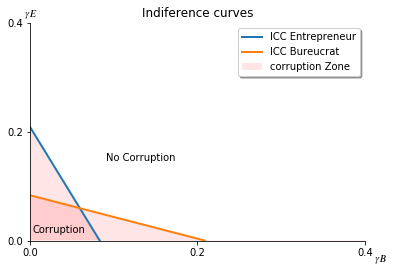

In [35]:
# testing the set of avilable solutions


def funE (gammaE = 0.13, gammaB = 0.12, betaB = 0.2, betaE = 0.25, p = 0.6 , P = 0.5 , R=0.05  ,F = 6, N = 0.05,b = 2 , pi = 4, alpha = 0.15 , rho = 0.2):
    return -b + pi*(1-gammaE)*(1-gammaB)*(1-alpha) + alpha*(1-gammaE)*(1-gammaB)*((1-betaE)*(1-betaB)*((1-rho)*pi-F*rho)-(1-betaB)*betaE*P*F-(1-betaE)*betaB*F-F*betaB*betaE*p)-(1-gammaB)*gammaE*R*F-(1-gammaE)*gammaB*F -gammaB*gammaE*N*F



def funB (gammaE = 0.13, gammaB = 0.12, betaB = 0.2, betaE = 0.25, p = 0.6 , P = 0.5 , R=0.05  ,F = 6, N = 0.05,b = 2 , pi = 4, alpha = 0.15 , rho = 0.2):
   # return  b*(1-gammaE)*(1-gammaB)*(1-alpha) + alpha*(1-gammaE)*(1-gammaB)*((1-betaE)*(1-betaB)*((1-rho)*b-F*rho)-(1-betaB)*betaE*F-(1-betaE)*betaB*F*P-F*betaB*betaE*p)-(1-gammaB)*gammaE*F-(1-gammaE)*gammaB*F*R -gammaB*gammaE*N*F
    return -b + pi*(1-gammaE)*(1-gammaB)*(1-alpha) + alpha*(1-gammaE)*(1-gammaB)*((1-betaE)*(1-betaB)*((1-rho)*pi-F*rho)-(1-betaB)*betaE*P*F-(1-betaE)*betaB*F-F*betaB*betaE*p)-(1-gammaB)*gammaE*R*F-(1-gammaE)*gammaB*F -gammaB*gammaE*N*F



fig, ax = plt.subplots()

ax.plot(x,  funE(x), linewidth=2)
ax.plot(funB(x), x, linewidth=2)



fig.add_subplot(ax)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig.text(0.92, 0.05, '$𝛾𝐵$')
fig.text(0.11, 0.9, '$𝛾𝐸$')

ax.fill_between( funB(x) ,x,  facecolor='red', alpha=0.1)
ax.fill_between( x,funE(x), facecolor='red', alpha=0.1)


plt.ylim([0, 0.4])
plt.xlim([0, 0.4])
plt.xticks(np.arange(0,0.41,0.2))
plt.yticks(np.arange(0,0.41,0.2))
plt.title('Indiference curves')
plt.legend(('ICC Entrepreneur', 'ICC Bureucrat', 'corruption Zone' ),
           loc='best', shadow=True)

fig.text(0.13, 0.15, 'Corruption')
fig.text(0.3, 0.4, 'No Corruption')
plt.show()

